In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
smdb = pd.read_csv('../Data/vgsales-12-4-2019-short.csv')
sglobal = pd.read_csv('../Data/vgsalesGlobale.csv')
pd.set_option('display.max_columns', None)

In [ ]:
smdb.head()

In [ ]:
sglobal.head()

In [ ]:
smdb.isna().sum()

In [ ]:
sglobal.isna().sum()

In [ ]:
smdb.info()

In [ ]:
sglobal.info()

In [ ]:
smdb_newdb = smdb[['Rank','Name', 'Global_Sales' ]] # Trying to combine the two dataframes

In [ ]:
# It wasn't working as intended after several tries
combined_db = sglobal.merge(smdb, left_on= 'Rank', right_on='Rank', how='inner')
combined_db

In [ ]:
combined_db.isna().sum()

In [ ]:
# Dropped my unwanted columns!
combined_dr = combined_db.drop(labels = ['Publisher_x', 'Year_x', 'Other_Sales_y', 'JP_Sales_y', 'Genre_y',
                                   'Platform_y', 'NA_Sales_y', 'Global_Sales_y', 'Total_Shipped', 'User_Score', 
                                  'Critic_Score', 'Platform_y', 'Name_y'], axis=1)
combined_dr

In [ ]:
combined_dr.isna().sum() # Dropping the columns with NaNs would have left me with the columns in the sglobal DF

In [ ]:
sglobal.isna().sum()# So I am running with the sglobal DF

In [3]:
# Only about 320 NaNs so I am dropping them!
sglobal_clean = sglobal.dropna()
sglobal_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
sglobal_clean = sglobal_clean.set_index("Rank") 

In [ ]:
sglobal_clean.isna().sum()

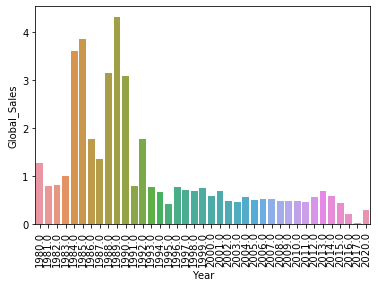

In [5]:
sns.barplot(sglobal_clean['Year'], sglobal_clean['Global_Sales'], ci=False )
plt.xticks(rotation=90); # why are the largest bars in the 80s when the larges sale was in the 2000s

In [ ]:
sglobal.head(10)

In [6]:
top_names = sglobal[sglobal['Name'][0:11]] 
top_sales = sglobal[sglobal['Global_Sales'][0:11]]
print(top_names)
print(top_sales)

KeyError: "None of [Index(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',\n       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',\n       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',\n       'Duck Hunt', 'Nintendogs'],\n      dtype='object')] are in the [columns]"

NameError: name 'top_names' is not defined

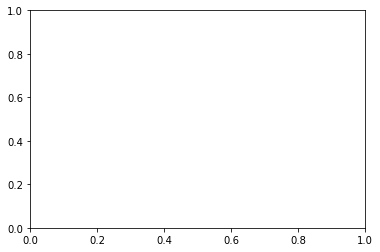

In [7]:
fig, ax = plt.subplots()
sns.barplot(x=top_names, y=top_earners, ci=False)
plt.title = 'Top Ten Earners'

In [ ]:
sglobal_clean.head()

In [8]:
# Didn't think the name of the videogame would matter if I had the sales record so I dropped it
sglobal_clean.drop(columns=['Name'], axis=1, inplace=True)

In [ ]:
sglobal_clean.head()

In [ ]:
sns.pairplot(sglobal_clean, kind='scatter');

### Making FSM

In [9]:
# Instantiating Vars 
y = sglobal_clean['Global_Sales']
X = sglobal_clean.drop('Global_Sales', axis=1)

In [10]:
# Instantiating train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [11]:
# One hotting categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X_train[['Platform', 'Genre', 'Publisher']],)

ohe_cats = pd.DataFrame(ohe.transform(X_train[['Platform', 'Genre', 'Publisher']]).todense(), 
                        columns=ohe.get_feature_names(),index=X_train.index)

ohe_cats.head()

,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_Idea 

In [12]:
# One hotting categorical columns

ohe_cats_test= pd.DataFrame(ohe.transform(X_test[['Platform', 'Genre', 'Publisher']]).todense(), 
                        columns=ohe.get_feature_names(),index=X_test.index)

ohe_cats_test.head()

,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_Idea 

In [13]:
# Dropping the unnecessary columns
X_test.drop(columns=['Platform', 'Genre', 'Publisher'], axis=1, inplace=True)

In [14]:
# Dropping the unnecessary columns
X_train.drop(columns=['Platform', 'Genre', 'Publisher'], axis=1, inplace=True)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [15]:
# Adding the one hotted columns back into the DF
X_train_ohe = pd.concat([X_train, ohe_cats], axis=1)
X_train_ohe.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_

In [16]:
# Adding the one hotted columns back into the DF
X_test_ohe = pd.concat([X_test, ohe_cats_test], axis=1)
X_test_ohe.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_

In [17]:
# I forgot about the multicolinearity of the sales columns to the Gloabal Sales column
X_train_ohe.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
X_train_ohe.head()

,Year,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_

In [ ]:
X_train_ohe.shape

In [18]:
# I forgot about the multicolinearity of the sales columns to the Gloabal Sales column
X_test_ohe.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
X_test_ohe.head()

,Year,x0_2600,x0_3DO,x0_3DS,x0_DC,x0_DS,x0_GB,x0_GBA,x0_GC,x0_GEN,x0_GG,x0_N64,x0_NES,x0_NG,x0_PC,x0_PCFX,x0_PS,x0_PS2,x0_PS3,x0_PS4,x0_PSP,x0_PSV,x0_SAT,x0_SCD,x0_SNES,x0_TG16,x0_WS,x0_Wii,x0_WiiU,x0_X360,x0_XB,x0_XOne,x1_Action,x1_Adventure,x1_Fighting,x1_Misc,x1_Platform,x1_Puzzle,x1_Racing,x1_Role-Playing,x1_Shooter,x1_Simulation,x1_Sports,x1_Strategy,x2_10TACLE Studios,x2_1C Company,x2_20th Century Fox Video Games,x2_2D Boy,x2_3DO,x2_49Games,x2_505 Games,x2_5pb,x2_7G//AMES,x2_989 Studios,x2_AQ Interactive,x2_ASC Games,x2_ASCII Entertainment,x2_ASCII Media Works,x2_ASK,x2_Abylight,x2_Acclaim Entertainment,x2_Accolade,x2_Ackkstudios,x2_Acquire,x2_Activision,x2_Activision Blizzard,x2_Activision Value,x2_Adeline Software,x2_Aerosoft,x2_Agatsuma Entertainment,x2_Agetec,x2_Aksys Games,x2_Alawar Entertainment,x2_Alchemist,x2_Alternative Software,x2_Alvion,x2_American Softworks,x2_Angel Studios,x2_Answer Software,x2_Aqua Plus,x2_Arc System Works,x2_Arena Entertainment,x2_Arika,x2_ArtDink,x2_Aruze Corp,x2_Ascaron Entertainment GmbH,x2_Asgard,x2_Asmik Ace Entertainment,x2_Asmik Corp,x2_Aspyr,x2_Astragon,x2_Asylum Entertainment,x2_Atari,x2_Athena,x2_Atlus,x2_Avalon Interactive,x2_Avanquest,x2_Avanquest Software,x2_Axela,x2_BAM! Entertainment,x2_BMG Interactive Entertainment,x2_BPS,x2_Banpresto,x2_Benesse,x2_Berkeley,x2_Bethesda Softworks,x2_Big Ben Interactive,x2_Big Fish Games,x2_Bigben Interactive,x2_Black Bean Games,x2_Black Label Games,x2_Blast! Entertainment Ltd,x2_Blue Byte,x2_Bohemia Interactive,x2_Bomb,x2_Boost On,x2_Brash Entertainment,x2_Broccoli,x2_BushiRoad,x2_CBS Electronics,x2_CCP,x2_CDV Software Entertainment,x2_CPG Products,x2_Capcom,x2_Cave,x2_ChunSoft,x2_City Interactive,x2_Cloud Imperium Games Corporation,x2_Coconuts Japan,x2_Codemasters,x2_Codemasters Online,x2_CokeM Interactive,x2_Coleco,x2_Comfort,x2_Commseed,x2_Compile,x2_Compile Heart,x2_Conspiracy Entertainment,x2_Core Design Ltd.,x2_Crave Entertainment,x2_Creative Core,x2_Crimson Cow,x2_Crystal Dynamics,x2_Culture Brain,x2_Culture Publishers,x2_CyberFront,x2_Cygames,x2_D3Publisher,x2_DHM Interactive,x2_DSI Games,x2_DTP Entertainment,x2_Daedalic,x2_Daedalic Entertainment,x2_Daito,x2_Data Age,x2_Data Design Interactive,x2_Data East,x2_Datam Polystar,x2_Deep Silver,"x2_Destination Software, Inc",x2_Destineer,x2_Detn8 Games,x2_Devolver Digital,x2_DigiCube,x2_Disney Interactive Studios,x2_Dorart,x2_DreamCatcher Interactive,x2_DreamWorks Interactive,x2_Dusenberry Martin Racing,x2_EA Games,x2_EON Digital Entertainment,x2_ESP,x2_Easy Interactive,x2_Ecole,x2_Edia,x2_Eidos Interactive,x2_Electronic Arts,x2_Elf,x2_Elite,x2_Empire Interactive,x2_Encore,x2_Enix Corporation,x2_Enjoy Gaming ltd.,x2_Enterbrain,x2_Epic Games,x2_Epoch,x2_Ertain,x2_Essential Games,x2_Evolved Games,x2_Excalibur Publishing,x2_Experience Inc.,x2_Falcom Corporation,x2_Fields,x2_Flashpoint Games,x2_Flight-Plan,x2_Focus Home Interactive,x2_Focus Multimedia,x2_Foreign Media Games,x2_Fox Interactive,x2_From Software,x2_FuRyu,x2_FuRyu Corporation,x2_Fuji,x2_FunSoft,x2_Funbox Media,x2_Funcom,x2_Funsta,x2_G.Rev,x2_GN Software,x2_GOA,x2_GSP,x2_GT Interactive,x2_Gaga,x2_Gainax Network Systems,x2_Gakken,x2_Game Arts,x2_Game Factory,x2_Game Life,x2_GameMill Entertainment,x2_GameTek,x2_Gamebridge,x2_Gamecock,x2_Gameloft,x2_Gathering of Developers,x2_General Entertainment,x2_Genki,x2_Ghostlight,x2_Giga,x2_Giza10,x2_Global A Entertainment,x2_Global Star,x2_Gotham Games,x2_Graffiti,x2_Grand Prix Games,x2_Graphsim Entertainment,x2_Gremlin Interactive Ltd,x2_Griffin International,x2_Groove Games,x2_GungHo,x2_Gust,x2_HAL Laboratory,x2_HMH Interactive,x2_Hackberry,x2_Hamster Corporation,x2_Happinet,x2_Harmonix Music Systems,x2_Hasbro Interactive,x2_Headup Games,x2_Hearty Robin,x2_Hect,x2_Hello Games,x2_Her Interactive,x2_Hip Interactive,x2_Home Entertainment Suppliers,x2_Hudson Entertainment,x2_Hudson Soft,x2_Human Entertainment,x2_HuneX,x2_IE Institute,x2_ITT Family Games,x2_Iceberg Interactive,x2_Idea Factory,x2_

In [ ]:
X_test_ohe.shape

### FSM using DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor(random_state=42, max_depth= 30, max_features= 90, min_samples_split= 20)

dtr.fit(X_train_ohe, y_train)

dtr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(dtr, X_train_ohe, y_train, cv = 5)

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'max_depth':[30, 35 ,40],
            'max_features': [50, 70, 90],
            'min_samples_split': [20, 25, 30]}

gridsearch = GridSearchCV(dtr, param_grid, cv=5)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train_ohe, y_train)
print(linreg.score(X_train_ohe, y_train))
print(mean_absolute_error(y_train, linreg.predict(X_train_ohe)))

0.1638689730193722
0.5089078496159622


In [33]:
cross_val_score(linreg, X_train_ohe_ss, y_train, cv = 3).mean()

-2.2092644136429e+28

### Ridge/Lasso

#### Ridge

In [58]:
from sklearn.linear_model import Ridge, Lasso
ss = StandardScaler()
ridge = Ridge(alpha=4)

#Scaling the data
X_train_ohe_ss = ss.fit_transform(X_train_ohe)
X_test_ohe_ss = ss.transform(X_test_ohe)

#Ridge
ridge.fit(X_train_ohe_ss, y_train)
print(ridge.score(X_train_ohe_ss, y_train))
print(mean_absolute_error(y_train, ridge.predict(X_train_ohe_ss)))

0.1638689180854238
0.5088479859699


In [37]:
cross_val_score(ridge, X_train_ohe_ss, y_train, cv = 3).mean()

0.13318953977419165

In [35]:
print(linreg.score(X_test_ohe_ss, y_test))
print(mean_absolute_error(y_test, linreg.predict(X_test_ohe_ss)))

-6.865673704383321e+21
110280847538.45244


In [ ]:
plt.plot(ridge.)

#### Lasso

In [63]:
lasso = Lasso(alpha=0.0)

lasso.fit(X_train_ohe_ss, y_train)
print(lasso.score(X_train_ohe_ss, y_train))
print(mean_absolute_error(y_train, lasso.predict(X_train_ohe_ss)))

0.1638689797111217
0.5089096513691244


In [ ]:
print(lasso.score(X_test_ohe_ss, y_test))
print(mean_squared_error(y_test, lasso.predict(X_test_ohe_ss)))

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=100, weights='uniform', algorithm = 'brute', p=1)

knr.fit(X_train_ohe, y_train)

knr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(knr, X_train_ohe, y_train, cv = 3)

In [ ]:
knr.score(X_test_ohe, y_test)

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'n_neighbors':[10, 100 ,500],
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree','kd_tree','brute' ]}

gridsearch = GridSearchCV(knr, param_grid, cv=5)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300, random_state=42,)

rfr.fit(X_train_ohe, y_train)

rfr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(rfr, X_train_ohe, y_train, cv = 3)

In [ ]:
rfr.score(X_test_ohe, y_test)

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

param_grid={'max_depth':[10, 50 ,100],
            'n_estimators':[100, 200, 300],
            'min_samples_split':[5, 10, 20]}

gridsearch = GridSearchCV(dtr, param_grid, cv=3)

gridsearch.fit(X_train_ohe, y_train);

gridsearch.best_params_

### Boosters

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

#### Adaboost Regressor

In [ ]:
abr = AdaBoostRegressor(random_state=42)

abr.fit(X_train_ohe, y_train)

abr.score(X_train_ohe, y=y_train)

In [ ]:
cross_val_score(abr, X_train_ohe, y_train, cv=5).mean()

In [ ]:
abr.fit(X_test_ohe, y_test)
abr.score(X_test_ohe, y=y_test)

#### Gradient Boost Regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train_ohe, y=y_train)

gbr.score(X_train_ohe, y_train)

In [ ]:
cross_val_score(gbr, X_train_ohe, y_train, cv=5).mean()

In [ ]:
abr.fit(X_test_ohe, y=y_test)
gbr.score(X_test_ohe, y_test)

### PCA

In [69]:
# Trying PCA to reduce the number of features the regression functions are using

from sklearn.decomposition import PCA

pca = PCA(n_components=200, random_state=42)

pca.fit(X_train_ohe)
X_train_ohe_pca = pca.transform(X_train_ohe)

X_train_ohe_pca.shape

(13032, 200)

#### Linear Regression

In [ ]:
linreg.fit(X_train_ohe_pca, y_train)
print(linreg.score(X_train_ohe_pca, y_train))

#### Ridge

In [ ]:
ridge.fit(X_train_ohe_pca, y_train)
print(ridge.score(X_train_ohe_pca, y_train))
print(mean_absolute_error(y_train, ridge.predict(X_train_ohe_pca)))

In [ ]:
ridge.score(X_test_ohe_pca, y_train)

#### Lasso

In [ ]:
lasso = Lasso(alpha=0.0)

lasso.fit(X_train_ohe_pca, y_train)
print(lasso.score(X_train_ohe_pca, y_train))

#### KNN

In [ ]:
knr = KNeighborsRegressor(n_neighbors=100, weights='uniform', algorithm = 'brute', p=1)

knr.fit(X_train_ohe_pca, y_train)

knr.score(X_train_ohe_pca, y_train)

In [ ]:
cross_val_score(knr, X_train_ohe_pca, y_train, cv = 3)

#### RFR

In [ ]:
rfr = RandomForestRegressor(n_estimators=300, random_state=42,)

rfr.fit(X_train_ohe_pca, y_train)

rfr.score(X_train_ohe_pca, y_train)

In [ ]:
cross_val_score(rfr, X_train_ohe_pca, y_train, cv = 3)

### Neural Network

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
model = models.Sequential()

model.add(layers.Dense(50, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(75, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(100, activation='linear', bias_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='linear', bias_regularizer=regularizers.l2(0.01)))

early_stop = EarlyStopping(monitor='loss', min_delta=1e-8, patience=1, verbose=1,
                           mode='min')

model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics='accuracy')

results = model.fit(X_train_ohe, y_train, epochs=5, batch_size=1, callbacks=[early_stop])

### SVR

In [68]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

svr.fit(X_train_ohe, y_train)
svr.score(X_train_ohe, y_train)

0.06281153514767268

In [67]:
mean_absolute_error(y_train, svr.predict(X_train_ohe))

468.20102721599255